In [1]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

ImportError: dlopen(./allthethings.so, 2): Library not loaded: /usr/local/opt/qd/lib/libqd.0.dylib
  Referenced from: /Users/anna/Dropbox/Research/Network7.0/allthethings.so
  Reason: image not found

In [12]:
fi = "indata/trajkovic.inp"
fc = "indata/trajkovic.config"
fc2 = "indata/trajkovic2.config"

mtype = 1
n1 = PyNetwork(fi,fc,mtype)
n2 = PyNetwork(fi, fc2, mtype)
M = n1.M
N = n1.Ns[0]
L = n1.Ls[0]
a = n1.a[0]
T =n1.T
D = 0.1
p1 = PyPipe_ps(N, D, L, M, a)
dt = T/M
print n1.a
e0 = p1.AofH(0.015, False)
print e0
b0= e0*np.ones(M+1)


[9.0]
0.000738747100465


In [13]:
n1.runForwardProblem(dt)

In [14]:
q = n1.q(0)
h = n1.getHofA(0)
qhist = n1.qhist(0)


In [15]:
n2.setbVal(1,b0);
n2.setIC(0,q[0:N],q[N:])
n2.runForwardProblem(dt)

In [16]:
def idx_t(i,j,n):
    return (2*(N+2)*n+(N+2)*i+j)

1530408
100
0.587208335795
0.000738747100465
[ 2.79977602  2.87976962  2.95976322  3.03975682  3.11975042  3.19974402
  3.27973762  3.35973122  3.43972482  3.51971842]
[0.08172265794449232, 0.08326082008461876, 0.08483027772735735, 0.08641113575961368, 0.08783116699649363, 0.08912305220918902, 0.09016572298587983, 0.0916003567314157, 0.09276716325546362, 0.09400360362242854]
[0.013918553141753965, 0.013880998414003823, 0.013834365679426575, 0.013779044614613302, 0.013715868274291243]


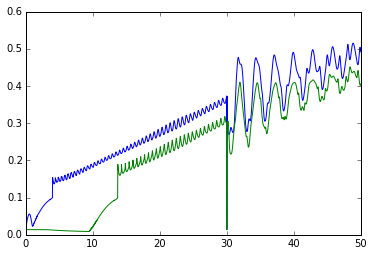

In [21]:
qhist2 = n2.qhist(0)
M2 = n2.M
t = linspace(0,n1.T+n2.T, M+1+M2+1)
print size(qhist)
print n1.Ns[0]
print n1.cmax[0]*dt*N/L
P5 = [p1.HofA(qhist[idx_t(0,76,n)], False) for n in range(M+1)]+[p1.HofA(qhist2[idx_t(0,76,n)], False) for n in range(M2+1)]
P7 = [p1.HofA(qhist[idx_t(0,96,n)], True) for n in range(M+1)]+[p1.HofA(qhist2[idx_t(0,96,n)], False) for n in range(M2+1)]
plot(t,P7)
plot(t,P5)
#plot(t,[qhist[idx_t(0,94,n)] for n in range(M+1)])
print b0[-1]
print t[700:900:20]
print P7[700:900:20]
print P5[700:800:20]